Explanatory variables:
# bank client data:
1 - age (numeric)
2 - job: type of job (categorical: "admin.", "unknown", "unemployed", "management",
"housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired",
"technician", "services")

3 - marital: marital status (categorical: "married","divorced","single"; note: "divorced"
means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no") # related with the last contact of
the current campaign:

9 - contact: contact communication type (categorical: "unknown", "telephone",
"cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov",
"dec")

12 - duration: last contact duration, in seconds (numeric)

# other attributes:

13 - campaign: number of contacts performed during this campaign and for this
client (numeric, includes last contact)14 - pdays: number of days that passed by after the client was last contacted from
a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this
client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical:
"unknown","other","failure","success")

Dependent variable:

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

This data is from https://archive.ics.uci.edu/dataset/222/bank+marketing

In [ ]:
# Mount GDrive to load data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load Data

In [ ]:
df_banking = pd.read_csv('/content/drive/MyDrive/Huynhmy/bank_train.csv')
df_banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36168 entries, 0 to 36167
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   36168 non-null  int64 
 1   age          36168 non-null  int64 
 2   job          35941 non-null  object
 3   marital      36168 non-null  object
 4   education    34687 non-null  object
 5   default      36168 non-null  object
 6   balance      36168 non-null  int64 
 7   housing      36168 non-null  object
 8   loan         36168 non-null  object
 9   contact      25716 non-null  object
 10  day_of_week  36168 non-null  int64 
 11  month        36168 non-null  object
 12  duration     36168 non-null  int64 
 13  campaign     36168 non-null  int64 
 14  pdays        36168 non-null  int64 
 15  previous     36168 non-null  int64 
 16  poutcome     6543 non-null   object
 17  y            36168 non-null  object
dtypes: int64(8), object(10)
memory usage: 5.0+ MB


In [ ]:
df_banking

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,39118,39,services,single,primary,no,471,yes,no,cellular,18,may,61,4,362,1,failure,no
1,31314,59,unemployed,married,secondary,no,0,no,no,cellular,11,mar,74,1,-1,0,NaN,no
2,21702,35,management,married,tertiary,no,86,yes,no,cellular,19,aug,144,3,-1,0,NaN,no
3,23150,40,management,married,tertiary,no,3160,no,no,cellular,26,aug,100,4,-1,0,NaN,no
4,40984,56,management,married,tertiary,no,616,no,no,cellular,13,aug,293,2,105,2,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,41370,34,blue-collar,single,secondary,no,869,no,no,cellular,31,aug,89,1,-1,0,NaN,no
36164,34038,33,management,married,tertiary,no,2599,no,no,cellular,30,apr,1373,2,-1,0,NaN,yes
36165,36088,38,retired,married,NaN,no,304,no,no,cellular,11,may,94,1,350,5,other,no
36166,19341,31,technician,single,secondary,no,200,no,no,cellular,6,aug,315,2,-1,0,NaN,no


In [ ]:
import pandas as pd

def missing(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Number of Missing Values', 1: 'Percentage of missing data'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        'Percentage of missing data', ascending=False).round(2)
    print("The data file includes: " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that contain missing values.")
    return mis_val_table_ren_columns



In [ ]:
print('The amount of missing data in the training set: \n')
missing(df_banking)

The amount of missing data in the training set: 

The data file includes: 18 columns.
There are 4 columns that contain missing values.


,Number of Missing Values,Percentage of missing data
poutcome,29625,81.91
contact,10452,28.90
education,1481,4.09
job,227,0.63


### Handling missing values in the 'poutcome' column.

In [ ]:
# Create a statistical table using crosstab
cross_table = pd.crosstab(df_banking['poutcome'], df_banking['y'])
print(cross_table)

y           no  yes
poutcome           
failure   3407  490
other     1207  248
success    420  771


**Observations**
- The column poutcome has a very high missing rate (81.91%) --> The solution is to remove the column poutcome to avoid affecting the prediction results.

In [ ]:
# drop column poutcome
df_banking = df_banking.drop('poutcome', axis=1)
df_banking

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,y
0,39118,39,services,single,primary,no,471,yes,no,cellular,18,may,61,4,362,1,no
1,31314,59,unemployed,married,secondary,no,0,no,no,cellular,11,mar,74,1,-1,0,no
2,21702,35,management,married,tertiary,no,86,yes,no,cellular,19,aug,144,3,-1,0,no
3,23150,40,management,married,tertiary,no,3160,no,no,cellular,26,aug,100,4,-1,0,no
4,40984,56,management,married,tertiary,no,616,no,no,cellular,13,aug,293,2,105,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,41370,34,blue-collar,single,secondary,no,869,no,no,cellular,31,aug,89,1,-1,0,no
36164,34038,33,management,married,tertiary,no,2599,no,no,cellular,30,apr,1373,2,-1,0,yes
36165,36088,38,retired,married,NaN,no,304,no,no,cellular,11,may,94,1,350,5,no
36166,19341,31,technician,single,secondary,no,200,no,no,cellular,6,aug,315,2,-1,0,no


### Handling missing values in the 'contact' column.

In [ ]:
cross_table = pd.crosstab(df_banking['contact'], df_banking['y'])
print(cross_table)

y             no   yes
contact               
cellular   19918  3485
telephone   2001   312


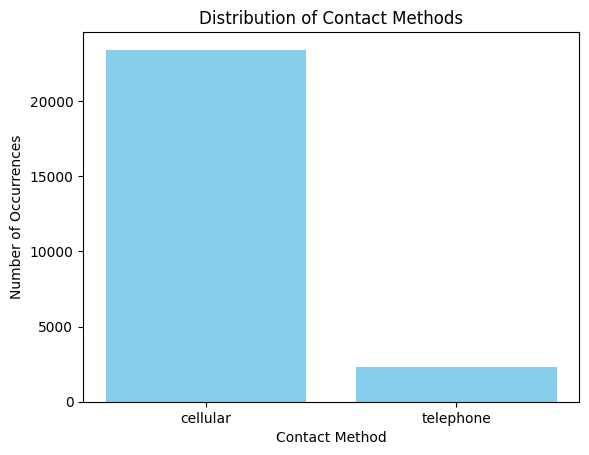

In [ ]:
contact_counts = df_banking['contact'].value_counts()

plt.bar(contact_counts.index, contact_counts.values, color='skyblue')
plt.xlabel('Contact Method')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Contact Methods')
plt.show()

**Observations**
- We see that the proportion of the cellular attribute is significantly higher than that of telephone --> Replace the missing values with the value cellular.

In [ ]:
df_banking['contact'].fillna(df_banking['contact'].mode().values[0], inplace=True)
df_banking

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,y
0,39118,39,services,single,primary,no,471,yes,no,cellular,18,may,61,4,362,1,no
1,31314,59,unemployed,married,secondary,no,0,no,no,cellular,11,mar,74,1,-1,0,no
2,21702,35,management,married,tertiary,no,86,yes,no,cellular,19,aug,144,3,-1,0,no
3,23150,40,management,married,tertiary,no,3160,no,no,cellular,26,aug,100,4,-1,0,no
4,40984,56,management,married,tertiary,no,616,no,no,cellular,13,aug,293,2,105,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,41370,34,blue-collar,single,secondary,no,869,no,no,cellular,31,aug,89,1,-1,0,no
36164,34038,33,management,married,tertiary,no,2599,no,no,cellular,30,apr,1373,2,-1,0,yes
36165,36088,38,retired,married,NaN,no,304,no,no,cellular,11,may,94,1,350,5,no
36166,19341,31,technician,single,secondary,no,200,no,no,cellular,6,aug,315,2,-1,0,no


###  Handling missing values in the 'education' column.

In [ ]:
cross_table = pd.crosstab(df_banking['education'], df_banking['y'])
print(cross_table)


y             no   yes
education             
primary     4993   468
secondary  16621  1974
tertiary    9051  1580


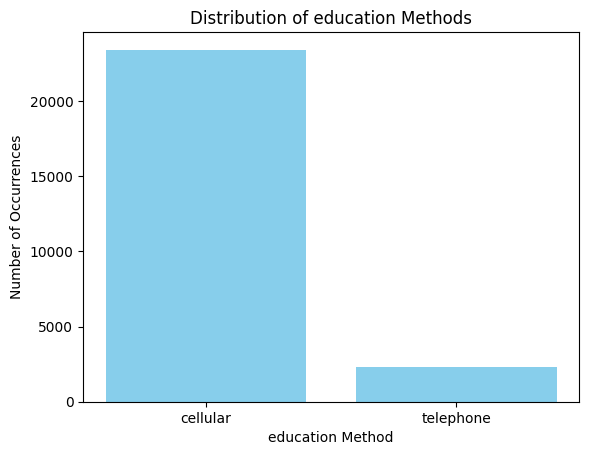

In [ ]:
education_counts = df_banking['education'].value_counts()

plt.bar(contact_counts.index, contact_counts.values, color='skyblue')
plt.xlabel('education Method')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of education Methods')
plt.show()

**Observations**
- We see that the proportion of secondary is much higher than the proportions of the other two attributes. Therefore, we will replace the missing values with secondary.

In [ ]:
df_banking['education'].fillna(df_banking['education'].mode().values[0], inplace=True)
df_banking

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,y
0,39118,39,services,single,primary,no,471,yes,no,cellular,18,may,61,4,362,1,no
1,31314,59,unemployed,married,secondary,no,0,no,no,cellular,11,mar,74,1,-1,0,no
2,21702,35,management,married,tertiary,no,86,yes,no,cellular,19,aug,144,3,-1,0,no
3,23150,40,management,married,tertiary,no,3160,no,no,cellular,26,aug,100,4,-1,0,no
4,40984,56,management,married,tertiary,no,616,no,no,cellular,13,aug,293,2,105,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,41370,34,blue-collar,single,secondary,no,869,no,no,cellular,31,aug,89,1,-1,0,no
36164,34038,33,management,married,tertiary,no,2599,no,no,cellular,30,apr,1373,2,-1,0,yes
36165,36088,38,retired,married,secondary,no,304,no,no,cellular,11,may,94,1,350,5,no
36166,19341,31,technician,single,secondary,no,200,no,no,cellular,6,aug,315,2,-1,0,no


###  Handling missing values in the 'job' column.  

In [ ]:
cross_table = pd.crosstab(df_banking['job'], df_banking['y'])
print(cross_table)

y                no   yes
job                      
admin.         3613   506
blue-collar    7194   560
entrepreneur   1105   105
housemaid       915    94
management     6497  1027
retired        1409   409
self-employed  1142   147
services       3036   302
student         539   217
technician     5402   659
unemployed      894   169


In [ ]:
# Replace "admin." with "admin."
df_banking.loc[df_banking['job'] == 'admin.', 'job'] = "admin"

In [ ]:
df_banking.loc[(df_banking['y'] == 'no') & (df_banking['job'].isna()), 'job'] = 'blue-collar'
df_banking.loc[(df_banking['y'] == 'yes') & (df_banking['job'].isna()), 'job'] = 'management'
df_banking

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,y
0,39118,39,services,single,primary,no,471,yes,no,cellular,18,may,61,4,362,1,no
1,31314,59,unemployed,married,secondary,no,0,no,no,cellular,11,mar,74,1,-1,0,no
2,21702,35,management,married,tertiary,no,86,yes,no,cellular,19,aug,144,3,-1,0,no
3,23150,40,management,married,tertiary,no,3160,no,no,cellular,26,aug,100,4,-1,0,no
4,40984,56,management,married,tertiary,no,616,no,no,cellular,13,aug,293,2,105,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,41370,34,blue-collar,single,secondary,no,869,no,no,cellular,31,aug,89,1,-1,0,no
36164,34038,33,management,married,tertiary,no,2599,no,no,cellular,30,apr,1373,2,-1,0,yes
36165,36088,38,retired,married,secondary,no,304,no,no,cellular,11,may,94,1,350,5,no
36166,19341,31,technician,single,secondary,no,200,no,no,cellular,6,aug,315,2,-1,0,no


### delete Unnamed: 0

In [ ]:
df_banking = df_banking.drop('Unnamed: 0', axis=1)
df_banking

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,y
0,39,services,single,primary,no,471,yes,no,cellular,18,may,61,4,362,1,no
1,59,unemployed,married,secondary,no,0,no,no,cellular,11,mar,74,1,-1,0,no
2,35,management,married,tertiary,no,86,yes,no,cellular,19,aug,144,3,-1,0,no
3,40,management,married,tertiary,no,3160,no,no,cellular,26,aug,100,4,-1,0,no
4,56,management,married,tertiary,no,616,no,no,cellular,13,aug,293,2,105,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,34,blue-collar,single,secondary,no,869,no,no,cellular,31,aug,89,1,-1,0,no
36164,33,management,married,tertiary,no,2599,no,no,cellular,30,apr,1373,2,-1,0,yes
36165,38,retired,married,secondary,no,304,no,no,cellular,11,may,94,1,350,5,no
36166,31,technician,single,secondary,no,200,no,no,cellular,6,aug,315,2,-1,0,no


### Review the dataset after processing.

In [ ]:
df_banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36168 entries, 0 to 36167
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          36168 non-null  int64 
 1   job          36168 non-null  object
 2   marital      36168 non-null  object
 3   education    36168 non-null  object
 4   default      36168 non-null  object
 5   balance      36168 non-null  int64 
 6   housing      36168 non-null  object
 7   loan         36168 non-null  object
 8   contact      36168 non-null  object
 9   day_of_week  36168 non-null  int64 
 10  month        36168 non-null  object
 11  duration     36168 non-null  int64 
 12  campaign     36168 non-null  int64 
 13  pdays        36168 non-null  int64 
 14  previous     36168 non-null  int64 
 15  y            36168 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.4+ MB


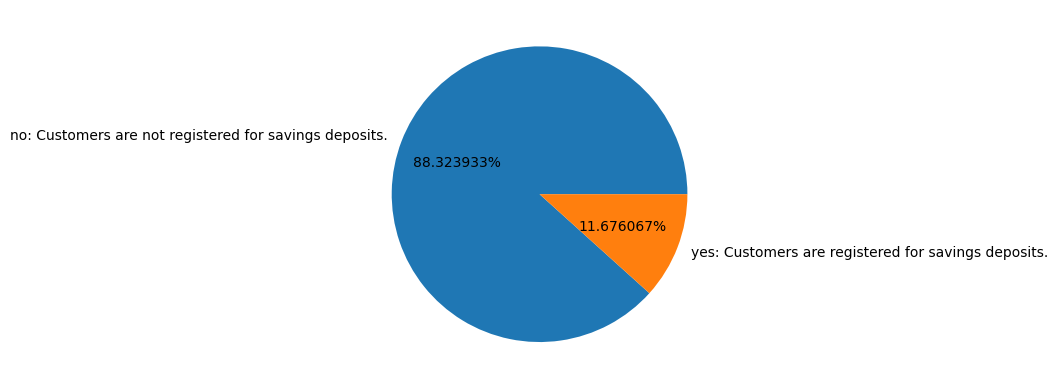

In [ ]:
#Data balance evaluation: labels (y)
check_y = df_banking['y'].value_counts()

plt.pie(check_y.values, labels=['no: Customers are not registered for savings deposits.','yes: Customers are registered for savings deposits.'], autopct='%2f%%')
plt.show()

**Observations**
Imbalanced data ---> Data imbalance handling

### Save the prepared data results.

In [ ]:
df_banking.to_csv('/content/drive/MyDrive/Huynhmy/bank_train.csv_ok.csv', index=None)
print('saved')

saved


### read processed data

In [ ]:
df_banking_ok = pd.read_csv('/content/drive/MyDrive/Huynhmy/bank_train.csv_ok.csv')
df_banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36168 entries, 0 to 36167
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          36168 non-null  int64 
 1   job          36168 non-null  object
 2   marital      36168 non-null  object
 3   education    36168 non-null  object
 4   default      36168 non-null  object
 5   balance      36168 non-null  int64 
 6   housing      36168 non-null  object
 7   loan         36168 non-null  object
 8   contact      36168 non-null  object
 9   day_of_week  36168 non-null  int64 
 10  month        36168 non-null  object
 11  duration     36168 non-null  int64 
 12  campaign     36168 non-null  int64 
 13  pdays        36168 non-null  int64 
 14  previous     36168 non-null  int64 
 15  y            36168 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.4+ MB


In [ ]:
df_banking_ok['job'] = df_banking_ok['job'].map( {'admin': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10} ).astype(int)

In [ ]:
df_banking_ok['marital'] = df_banking_ok['marital'].map( {'divorced': 0, 'married': 1, 'single': 2} ).astype(int)

In [ ]:
df_banking_ok['education'] = df_banking_ok['education'].map( {'primary': 0, 'secondary': 1, 'tertiary': 2} ).astype(int)

In [ ]:
df_banking_ok['default'] = df_banking_ok['default'].map( {'no': 0, 'yes': 1} ).astype(int)

In [ ]:
df_banking_ok['housing'] = df_banking_ok['housing'].map( {'no': 0, 'yes': 1} ).astype(int)

In [ ]:
df_banking_ok['loan'] = df_banking_ok['loan'].map( {'no': 0, 'yes': 1} ).astype(int)

In [ ]:
df_banking_ok['contact'] = df_banking_ok['contact'].map( {'cellular': 0, 'telephone': 1} ).astype(int)

In [ ]:
df_banking_ok['month'] = df_banking_ok['month'].map({'jan': 0,'feb': 1,'mar': 2,'apr': 3,'may': 4,'jun': 5,'jul': 6,'aug': 7,'sep': 8,'oct': 9,'nov': 10, 'dec':11}).astype(int)

In [ ]:
df_banking_ok['y'] = df_banking_ok['y'].map( {'no': 0, 'yes': 1} ).astype(int)

In [ ]:
df_banking_ok

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,y
0,39,7,2,0,0,471,1,0,0,18,4,61,4,362,1,0
1,59,10,1,1,0,0,0,0,0,11,2,74,1,-1,0,0
2,35,4,1,2,0,86,1,0,0,19,7,144,3,-1,0,0
3,40,4,1,2,0,3160,0,0,0,26,7,100,4,-1,0,0
4,56,4,1,2,0,616,0,0,0,13,7,293,2,105,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,34,1,2,1,0,869,0,0,0,31,7,89,1,-1,0,0
36164,33,4,1,2,0,2599,0,0,0,30,3,1373,2,-1,0,1
36165,38,5,1,1,0,304,0,0,0,11,4,94,1,350,5,0
36166,31,9,2,1,0,200,0,0,0,6,7,315,2,-1,0,0


### Separate independent variable dependent variable

In [ ]:
#List the names of the columns.
df_banking_ok.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'y'],
      dtype='object')

In [ ]:
# Separate independent variable data:
X_data = df_banking_ok.loc[:,['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous']]
X_data

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous
0,39,7,2,0,0,471,1,0,0,18,4,61,4,362,1
1,59,10,1,1,0,0,0,0,0,11,2,74,1,-1,0
2,35,4,1,2,0,86,1,0,0,19,7,144,3,-1,0
3,40,4,1,2,0,3160,0,0,0,26,7,100,4,-1,0
4,56,4,1,2,0,616,0,0,0,13,7,293,2,105,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,34,1,2,1,0,869,0,0,0,31,7,89,1,-1,0
36164,33,4,1,2,0,2599,0,0,0,30,3,1373,2,-1,0
36165,38,5,1,1,0,304,0,0,0,11,4,94,1,350,5
36166,31,9,2,1,0,200,0,0,0,6,7,315,2,-1,0


In [ ]:
# Separate dependent variable data:
y_data = df_banking_ok.loc[:,['y']]
y_data

,y
0,0
1,0
2,0
3,0
4,1
...,...
36163,0
36164,1
36165,0
36166,0


### Split the dataset into Training and Test sets.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, train_size=0.8, shuffle=True, random_state=42)

print("1. Training set size: %d" %len(y_train))
print("2. Size of the Test Set    : %d" %len(y_test))

1. Training set size: 28934
2. Size of the Test Set    : 7234


### Handling imbalanced data

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Utilize SMOTE to augment data for the minor class.
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Output the number of samples before and after applying SMOTE.
print("The number of samples before applying SMOTE:", len(X_train))
print("The number of samples after applying SMOTE:", len(X_train_resampled))


The number of samples before applying SMOTE: 28934
The number of samples after applying SMOTE: 51032


In [ ]:
# Import the scikit-learn library with the KNN classification algorithm.
from sklearn.neighbors import KNeighborsClassifier

#Declare the KNN model.
KNN_Practice = KNeighborsClassifier(n_neighbors= 16 , p = 2)


# Display the parameter list:
KNN_Practice.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 16,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
#Perform training with the training dataset after applying SMOTE.
KNN_Practice.fit(X_train_resampled,y_train_resampled)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=16)

In [ ]:
#Accuracy rate on the training set:
acc_train = KNN_Practice.score(X_train,y_train)
print('Accuracy rate on the training set:', round(acc_train*100,2))

Accuracy rate on the training set: 81.63


In [ ]:
#Accuracy rate on the test set:
from sklearn.metrics import accuracy_score
y_pred = KNN_Practice.predict(X_test)
acc2 = accuracy_score(y_test,y_pred,normalize= True)
print('The percentage of accurate predictions is: ',round(acc2*100,2),'%')

The percentage of accurate predictions is:  77.07 %


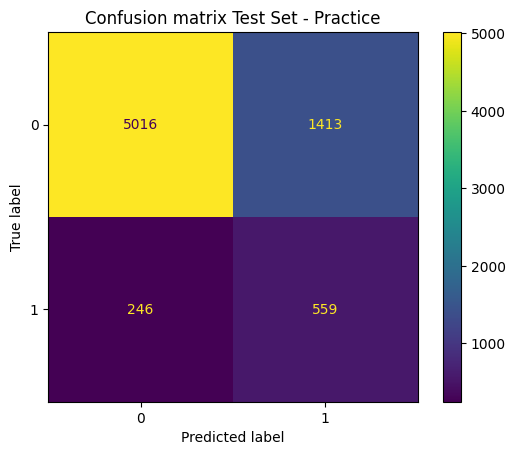

In [ ]:
#Utilize the confusion matrix to assess the results::
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cnf_matrix_Practice = confusion_matrix(y_test,y_pred)

#Display the matrix:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix Test Set - Practice')
plt.show()

In [ ]:
#The customer data needs to be predicted:
age = 35
job = 7
marital = 2
education = 0
default = 0
balance = 417
housing = 1
loan = 0
contact = 0
day_of_week = 18
month = 4
duration = 61
campaign = 4
pdays = 362
previous = 1

khachhang = np.array([(age,	job,	marital,	education,	default,	balance,	housing,	loan,	contact,	day_of_week,	month,	duration,	campaign,	pdays,	previous)])
print("Customer information", khachhang)

Customer information [[ 35   7   2   0   0 417   1   0   0  18   4  61   4 362   1]]


In [ ]:
#Utilize the model for prediction.:
y_pred = KNN_Practice.predict(khachhang)
print(y_pred)
if y_pred == 1:
    print('The customer will send money.')
else:
    print('The customer will not send money.')

[0]
The customer will not send money.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
